# Latin Hypercube Sampling
Author: Lohit Vandanapu
Date: June 04, 2018

In this example, the Latin Hypercube design is employed to generate samples from a normal distribution. The method illustrates various aspects of the UQpy LHS class. 

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the LHS class from UQpy.

In [1]:
from UQpy.SampleMethods import LHS
import numpy as np
import matplotlib.pyplot as plt
import time

Run LHS using the different criterion for 5 samples.
    - 2 dimensions
    - Normal pdf with unit variance.

Run with criterion as 'random'

In [2]:
x = LHS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], lhs_criterion='random', lhs_metric=None, lhs_iter=None, nsamples=5)
samples_random = x.samplesU01

UQpy: Performing LHS design...
Done


Run with criterion as 'centered'

In [3]:
y = LHS(dimension=2,  dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], lhs_criterion='centered', lhs_metric=None, lhs_iter=None, nsamples=5)
samples_centered = y.samplesU01

UQpy: Performing LHS design...
Done


Run with criterion as 'maximin'

In [4]:
z = LHS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], lhs_criterion='maximin', lhs_metric='euclidean', lhs_iter=100, nsamples=5)
samples_maximin = z.samplesU01

UQpy: Performing LHS design...
Achieved max_min distance of  0.430331412568
Done


Run with criterion as 'correlate'

In [5]:
u = LHS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], lhs_criterion='correlate', lhs_metric=None, lhs_iter=100, nsamples=5)
samples_correlate = u.samplesU01

UQpy: Performing LHS design...
Achieved minimum correlation of  0.00519330154907
Done


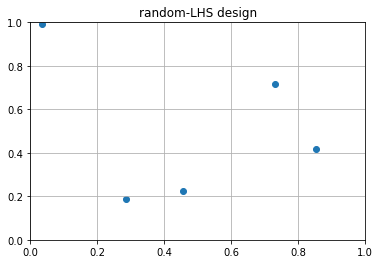

In [6]:
fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(samples_random[:, 0], samples_random[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

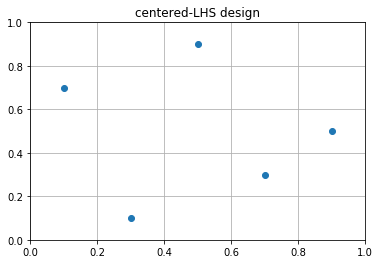

In [7]:
fig, ax = plt.subplots()
plt.title('centered-LHS design')
plt.scatter(samples_centered[:, 0], samples_centered[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

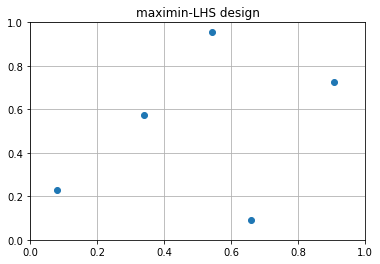

In [8]:
fig, ax = plt.subplots()
plt.title('maximin-LHS design')
plt.scatter(samples_maximin[:, 0], samples_maximin[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

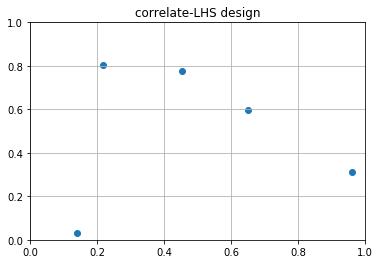

In [9]:
fig, ax = plt.subplots()
plt.title('correlate-LHS design')
plt.scatter(samples_correlate[:, 0], samples_correlate[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()